**Import packages**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
import config
from download_central_bank_tweets import sync
from aggregate_climate_data import aggregate

**Download Twitter data**

In [4]:
sync()

Querying 1 periods: [('2021-05-20', None)].
Dropped 570 duplicate Tweet IDs.
Reached date: 2021-05-20. Downloaded 3987976 tweets total.
Done syncing!


**Aggregate into monthly data**

In [5]:
aggregate()

Reading in data.
Aggregating by month.
Saving results locally.
Attempting network save
Successfully saved to network path: H:/Alle/data_sharing/climate_results.xlsx
...Done!


**Read in the monthly data**

In [6]:
df = pd.read_excel(config.climate_results_file)

In [7]:
df.head()

,month,contains_central_bank,contains_climate_change,ratio,ratio_rolling_avg_12
0,2010-01,9713,1,0.000103,NaN
1,2010-02,7364,0,0.000000,NaN
2,2010-03,10584,1,0.000094,NaN
3,2010-04,9397,1,0.000106,NaN
4,2010-05,10388,0,0.000000,NaN


**Plot the percentage of tweets mentioning central banks which also mention climate change**

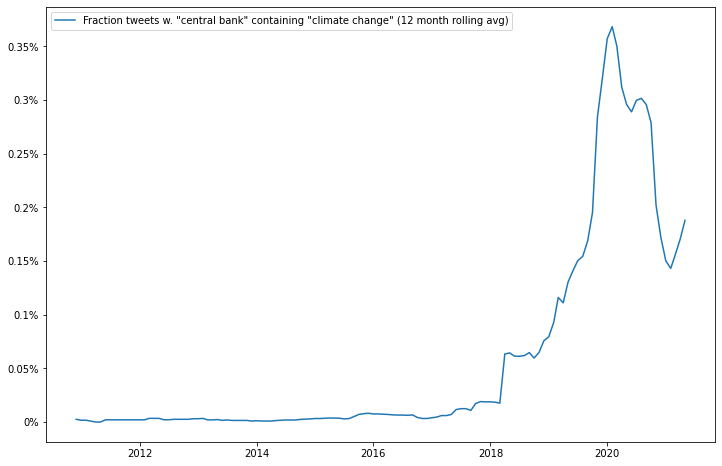

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
x = [datetime.datetime.strptime(s+"-01", "%Y-%m-%d") for s in df["month"]]
window = 12
y = df["ratio"].rolling(window=window).mean()
label = f'Fraction tweets w. "central bank" containing "climate change" ({window} month rolling avg)'
ax.plot(x, y, label=label)

ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda val, pos: f"{100*val:.2g}%"))
ax.legend();